In [1]:
from jax import vmap, random
import jax.numpy as jnp
import matplotlib.pyplot as plt
import scipy as scp

In [2]:
key = random.key(101)

c:\Users\Owner\Desktop\GaussianProcesses\venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Owner\Desktop\GaussianProcesses\venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


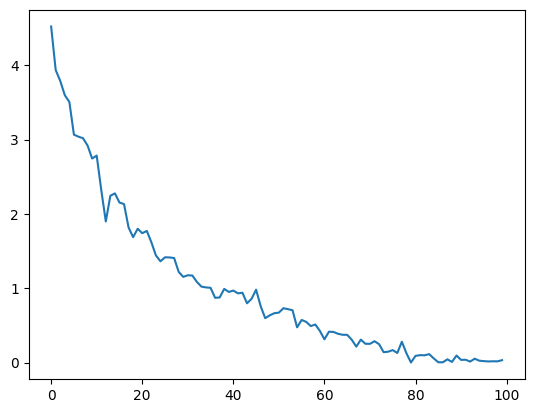

In [21]:
def kernel(gamma):
    def rbf(x, y):
        return jnp.exp(-gamma*jnp.sum((x-y)**2))
    return rbf

k = kernel(5)

vec_k = vmap(vmap(k, in_axes=(None ,0)), in_axes=(0, None))

N, M = 100,100
S = 10

X1 = 5*random.uniform(key, shape=(N, 2))
X2 = 5*random.uniform(key, shape=(M, 2))

K = vec_k(X1, X1) 

K_SX = K[:S, :]

K_SS = K[:S, :S]

NysK = K_SX.T @ jnp.linalg.inv(K_SS) @ K_SX


plt.plot(jnp.linalg.eigvals(K))

In [ ]:
lambda_ = 0.01

C = NysK + lambda_*jnp.eye(N)

iCWoodbury = (1/lambda_)*jnp.eye(N) - (1/lambda_)*K_SX.T @ jnp.linalg.inv(K_SS + (1/lambda_)* K_SX @ K_SX.T) @ K_SX * (1/lambda_)

iC = jnp.linalg.inv(C)

print(f"General condition number: {jnp.linalg.cond(C)}")
print(f"KSS condition number: {jnp.linalg.cond(K_SS)}")
print(jnp.linalg.norm(iC @ C - jnp.eye(N)))
print(jnp.linalg.norm(iCWoodbury @ C - jnp.eye(N)))

General condition number: 341.75726318359375
KSS condition number: 5.569576263427734
341.7502
6.7071414e-05
0.00014303475
